In [1]:
#Install tensorflow text
!pip install -q tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 18.8 MB/s eta 0:00:00


#Import packages

In [2]:
import os
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow_text as text
from model import multimodal_model
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from bert_from_model_hub import bert_from_model_hub
from data_utils import prepare_datasets
from data_viz import data_viz
import matplotlib.pyplot as plt
import seaborn as sns

#Download and load dataset

In [3]:
#Download dataset (images + tweets)
image_base_path = keras.utils.get_file("tweet_images",
                                       "https://github.com/sayakpaul/Multimodal-Entailment-Baseline/releases/download/v1.0.0/tweet_images.tar.gz",
                                       untar=True)
#Read data file
df = pd.read_csv("https://github.com/sayakpaul/Multimodal-Entailment-Baseline/raw/main/csvs/tweets.csv")

#Print few entries
df.head(10)

344273442/344273442 [==============================] - 22s 0us/step


,id_1,text_1,image_1,id_2,text_2,image_2,label
0,1375936088968200205,"150 years after its inauguration, the strategi...",http://pbs.twimg.com/media/ExeIVRBWYAAwizQ.jpg,1376653595144241155,Look how only 190 km #suezcanel carries 12% of...,http://pbs.twimg.com/media/ExrbJffWgAoBaxO.jpg,NoEntailment
1,1360981123388436489,Fall Guys is celebrating Valentine's Day with ...,http://pbs.twimg.com/media/EuMowPiXYAEylR8.jpg,1361075903606910976,Fall Guys Red Panda costume available for limi...,http://pbs.twimg.com/media/EuODUixWYAMRukK.jpg,NoEntailment
2,1336637206899945472,Impressive Batting Display From Shoaib Malik 🏏...,http://pbs.twimg.com/media/EoywcVGXMAE5FZK.jpg,1339243901799030785,"A Half century of King\n\n 🔥""Shoaib Malik"" ...",http://pbs.twimg.com/media/EpXzOwRXYAYLaCB.jpg,NoEntailment
3,1336490796279742464,How #confident are you today? https://t.co/5ay...,http://pbs.twimg.com/media/EowrS9aVEAAMhsF.jpg,1341081069248868353,How #confident are you today? https://t.co/KqZ...,http://pbs.twimg.com/media/Epx6IA-UwAA8pqN.jpg,Implies
4,1358934899256877059,The Peacocks finish out the first quarter trai...,http://pbs.twimg.com/media/EtvoCsuWQAALmyP.jpg,1361131487077228546,10 minutes gone here at home as the Peacocks l...,http://pbs.twimg.com/media/EuO1xf2XIAAOIGb.jpg,NoEntailment
5,1354383946704936961,No pants required\n\n#nudeguyyoga #nudeinpubli...,http://pbs.twimg.com/media/Esu9BS7XEAI4P0I.jpg,1371763441883615237,Who needs pants!\n\n#pantsdown #pantsless #exh...,http://pbs.twimg.com/media/Ewl7lIiWEAULNA_.jpg,Implies
6,1361247629309575175,"Rapper #NickiMinaj's father, #RobertMaraj dies...",http://pbs.twimg.com/media/EuQX-CqVgAUQ8xo.jpg,1361404080057438211,So Sorry and devastated for your loss @NICKIMI...,http://pbs.twimg.com/media/EuOqCoFUUAAP0wk.jpg,NoEntailment
7,1354642121647665153,$BTC\n\nBreakout! Time to long the retest. Ent...,http://pbs.twimg.com/media/Esymv7nW8AYBUi6.jpg,1377375542555504647,UPDATE 5: I was wrong on the inverted hammer b...,http://pbs.twimg.com/media/Ex1rWafXMAYwgFy.png,NoEntailment
8,1382000658740576258,Don't forget to grab your cup of #tea and list...,http://pbs.twimg.com/media/Ey3aRpFXEAE_I9X.jpg,1382180579970535426,catch the #Repeat #broadcast at 12:00 a.m. EST...,http://pbs.twimg.com/media/Ey596b8WgAEV5Rw.jpg,Implies
9,1334036815955644419,Stay updated with BOTT Shots! \nYour Story Sta...,http://pbs.twimg.com/media/EoNpHCxUwAEpmHH.jpg,1367364885558915073,Stay updated with BOTT Shots! \nYour Story Sta...,http://pbs.twimg.com/media/Evnak-2UcAIagJU.jpg,NoEntailment


#Data pre-processing and visualization

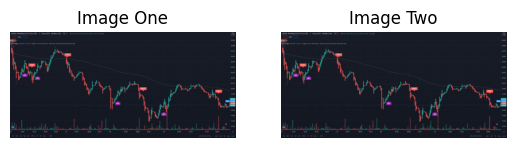

Text one: Signals could not be any clearer on the 1-min chart for $AERI when with the entry/exit indicators. Get a free trial of our UltraAlgo tool at  https://t.co/wOJwxNKs9p  
#StockMarket #StocksToWatch #stocks #trading #AERI https://t.co/lY6I3enjjW
Text two: Signals could not be any clearer on the 1-min chart for $AEZS  when with the entry/exit indicators. Get a free trial of our UltraAlgo tool at  https://t.co/wOJwxNKs9p  
#StockMarket #StocksToWatch #stocks #trading #AEZS https://t.co/PJvPqy9siR
Label: NoEntailment


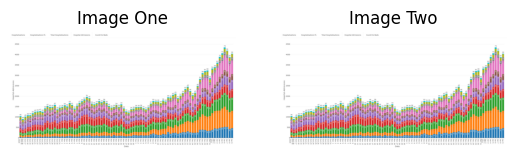

Text one: New admissions (10 Jan): 3844. England: 3571 
Yesterday (09 Jan): 4096. England: 3718
Last Week (03 Jan): 3617. England: 3351

Summer Peak: 3565 (01 Apr)
Winter Peak: 4357 (06 Jan)
Eng Summer: 3099 (01 Apr)
Eng Winter: 3967 (06 Jan) https://t.co/Ht90ubOiOd
Text two: New admissions (28 Jan): 3003. England: 2719 
Yesterday (27 Jan): 3042. Eng: 2742
Last Week (21 Jan): 3612. England: 3237

Spring Peak: 3565 (01 Apr)
Winter Peak: 4571 (12 Jan)
Eng Spring: 3099 (01 Apr)
Eng Winter: 4134 (12 Jan) https://t.co/IXBhj84BYq
Label: NoEntailment


In [22]:
#Output labels
label_map = {"Contradictory": 0, "Implies": 1, "NoEntailment": 2}
#Images paths
images_one_paths = []
images_two_paths = []
#Iterate over each entry and get images paths
for idx in range(len(df)):
    current_row = df.iloc[idx]
    id_1 = current_row["id_1"]
    id_2 = current_row["id_2"]
    extentsion_one = current_row["image_1"].split(".")[-1]
    extentsion_two = current_row["image_2"].split(".")[-1]

    image_one_path = os.path.join(image_base_path, str(id_1) + f".{extentsion_one}")
    image_two_path = os.path.join(image_base_path, str(id_2) + f".{extentsion_two}")
    #Store image paths
    images_one_paths.append(image_one_path)
    images_two_paths.append(image_two_path)

#Create dataframe of the paths
df["image_1_path"] = images_one_paths
df["image_2_path"] = images_two_paths

#Encode the labels
df["label_idx"] = df["label"].apply(lambda x: label_map[x])

#Create train, validation and testing splits in the data
train_df, test_df = train_test_split(df, test_size=0.1, stratify=df["label"].values, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.05, stratify=train_df["label"].values, random_state=42)

#Visualize some image and text pairs
random_idx = np.random.choice(len(df))
data_viz(random_idx, df)
random_idx = np.random.choice(len(df))
data_viz(random_idx, df)

In [23]:
#BERT Model paths
bert_model_path = ("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1")
bert_preprocess_path = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
#Import BERT model
bert_preprocess_model = bert_from_model_hub(["text_1", "text_2"],
                                            bert_model_path=bert_model_path,
                                            bert_preprocess_path=bert_preprocess_path)

#Prepare data for training and validation using tensorflow datasets class
batch_size = 32
train_ds, validation_ds, test_ds = prepare_datasets(batch_size,
                                                    bert_preprocess_model,
                                                    train_df, val_df, test_df)

#Model Architecture Designing and Training

94668760/94668760 [==============================] - 5s 0us/step


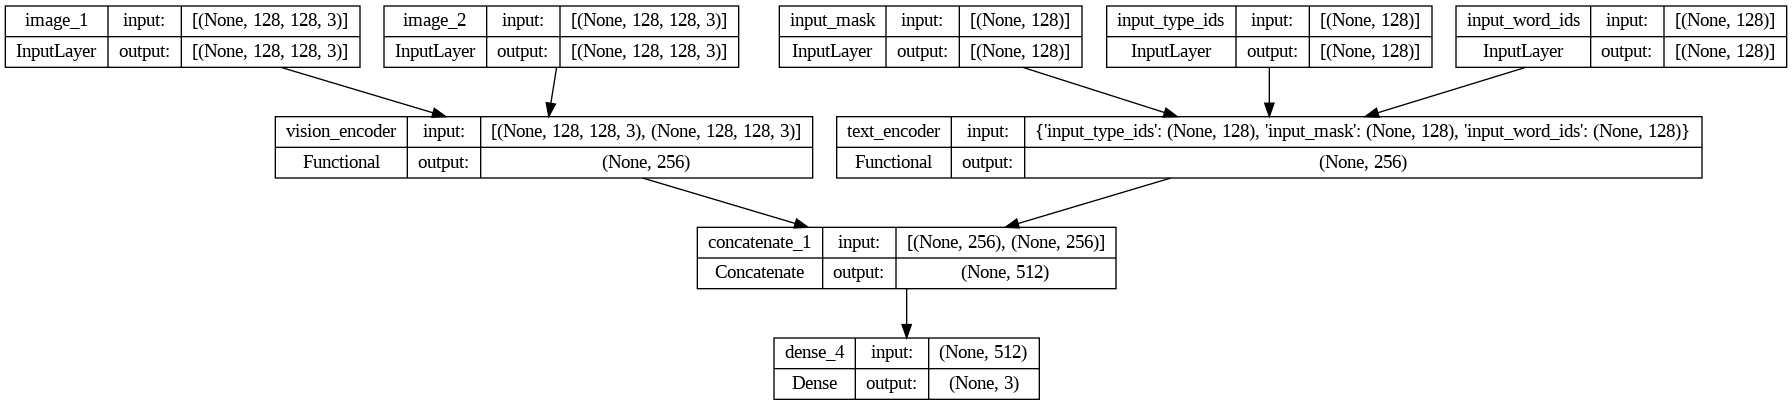

In [24]:
#Construct multimodal model
multimodal_model = multimodal_model(bert_model_path=bert_model_path)
#Model compilation for training
multimodal_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
#Plot the model
plot_model(multimodal_model, show_shapes=True)

In [25]:
#Model Training
history = multimodal_model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
38/38 [==============================] - 50s 791ms/step - loss: 1.1129 - accuracy: 0.8254 - val_loss: 0.5641 - val_accuracy: 0.8571
Epoch 2/10
38/38 [==============================] - 3s 82ms/step - loss: 0.4158 - accuracy: 0.8780 - val_loss: 0.5618 - val_accuracy: 0.8571
Epoch 3/10
38/38 [==============================] - 3s 85ms/step - loss: 0.3882 - accuracy: 0.8747 - val_loss: 0.6021 - val_accuracy: 0.8571
Epoch 4/10
38/38 [==============================] - 3s 83ms/step - loss: 0.3259 - accuracy: 0.8922 - val_loss: 0.7566 - val_accuracy: 0.8571
Epoch 5/10
38/38 [==============================] - 3s 83ms/step - loss: 0.2144 - accuracy: 0.9282 - val_loss: 1.1305 - val_accuracy: 0.8413
Epoch 6/10
38/38 [==============================] - 3s 83ms/step - loss: 0.1639 - accuracy: 0.9449 - val_loss: 1.2068 - val_accuracy: 0.7778
Epoch 7/10
38/38 [==============================] - 3s 87ms/step - loss: 0.1813 - accuracy: 0.9382 - val_loss: 1.1136 - val_accuracy: 0.8254
Epoch 8/10


#Model Evaluation

5/5 [==============================] - 5s 890ms/step - loss: 1.0510 - accuracy: 0.8071
Accuracy on the test set: 80.71%.


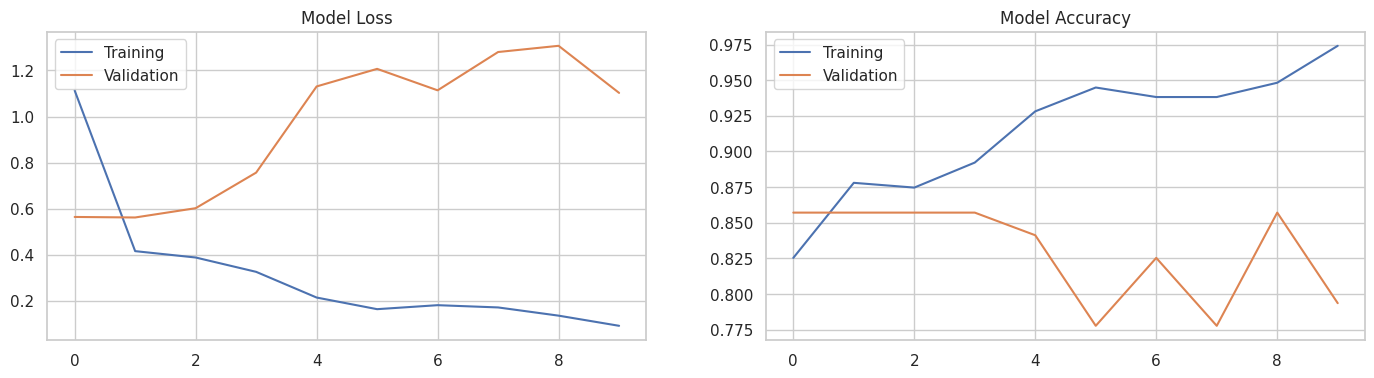

In [26]:
sns.set_theme(style='whitegrid')
#Plot model loss
plt.figure(figsize=(17,4), dpi=100)
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.legend(["Training", "Validation"])
#Plot model accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.legend(["Training", "Validation"])

#Model accuracy on test set
_, acc = multimodal_model.evaluate(test_ds)
print(f"Accuracy on the test set: {round(acc * 100, 2)}%.")